# Compute a dataframe containing all behavior for each subject

* How it works
    #finger0_deriv = np.abs(np.diff(finger0))
    #thresh = 50
    #is_moving_finger0 = finger0_deriv > thresh
    #move_samples_finger0 = np.argwhere(is_moving==1).transpose()[0]
    #move_samples_diff_finger0 = np.diff(move_samples_finger0)

# Imports

In [13]:
from __future__ import print_function
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

import util
import imp
imp.reload(util)

<module 'util' from 'C:\\Users\\Yimeng\\Documents\\GitHub\\learnshape\\dg\\data_processing\\util.py'>

# Load data

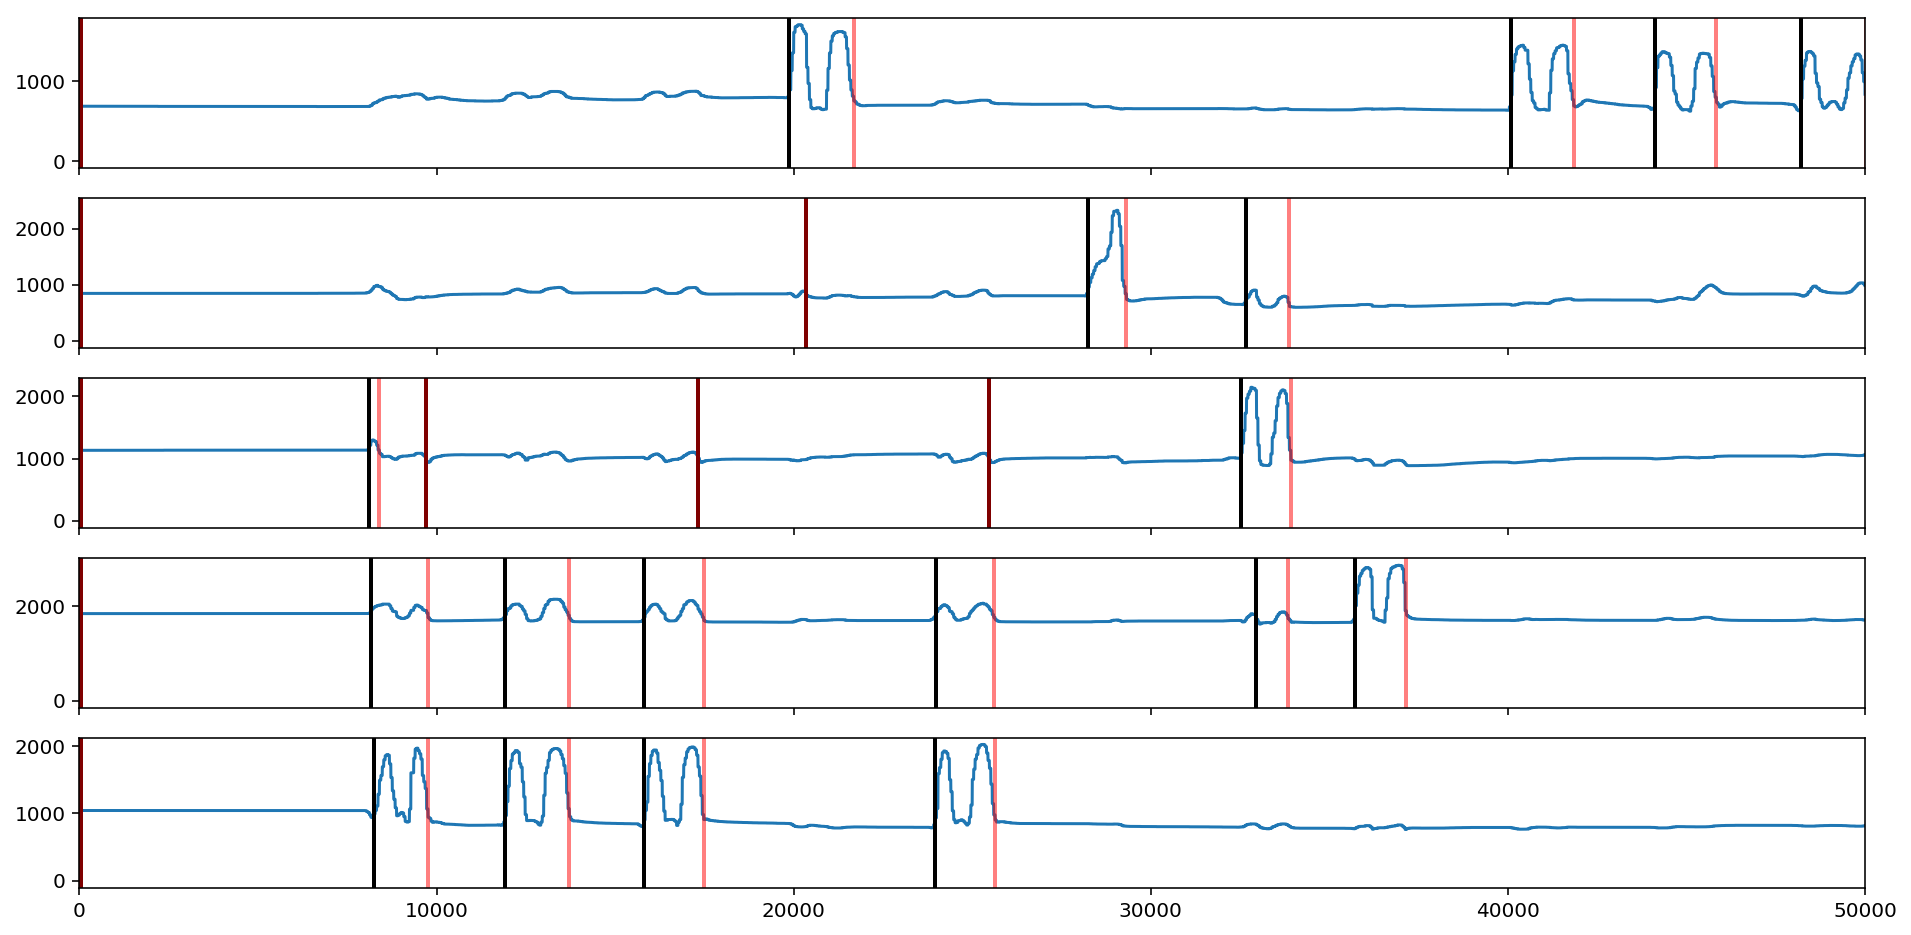

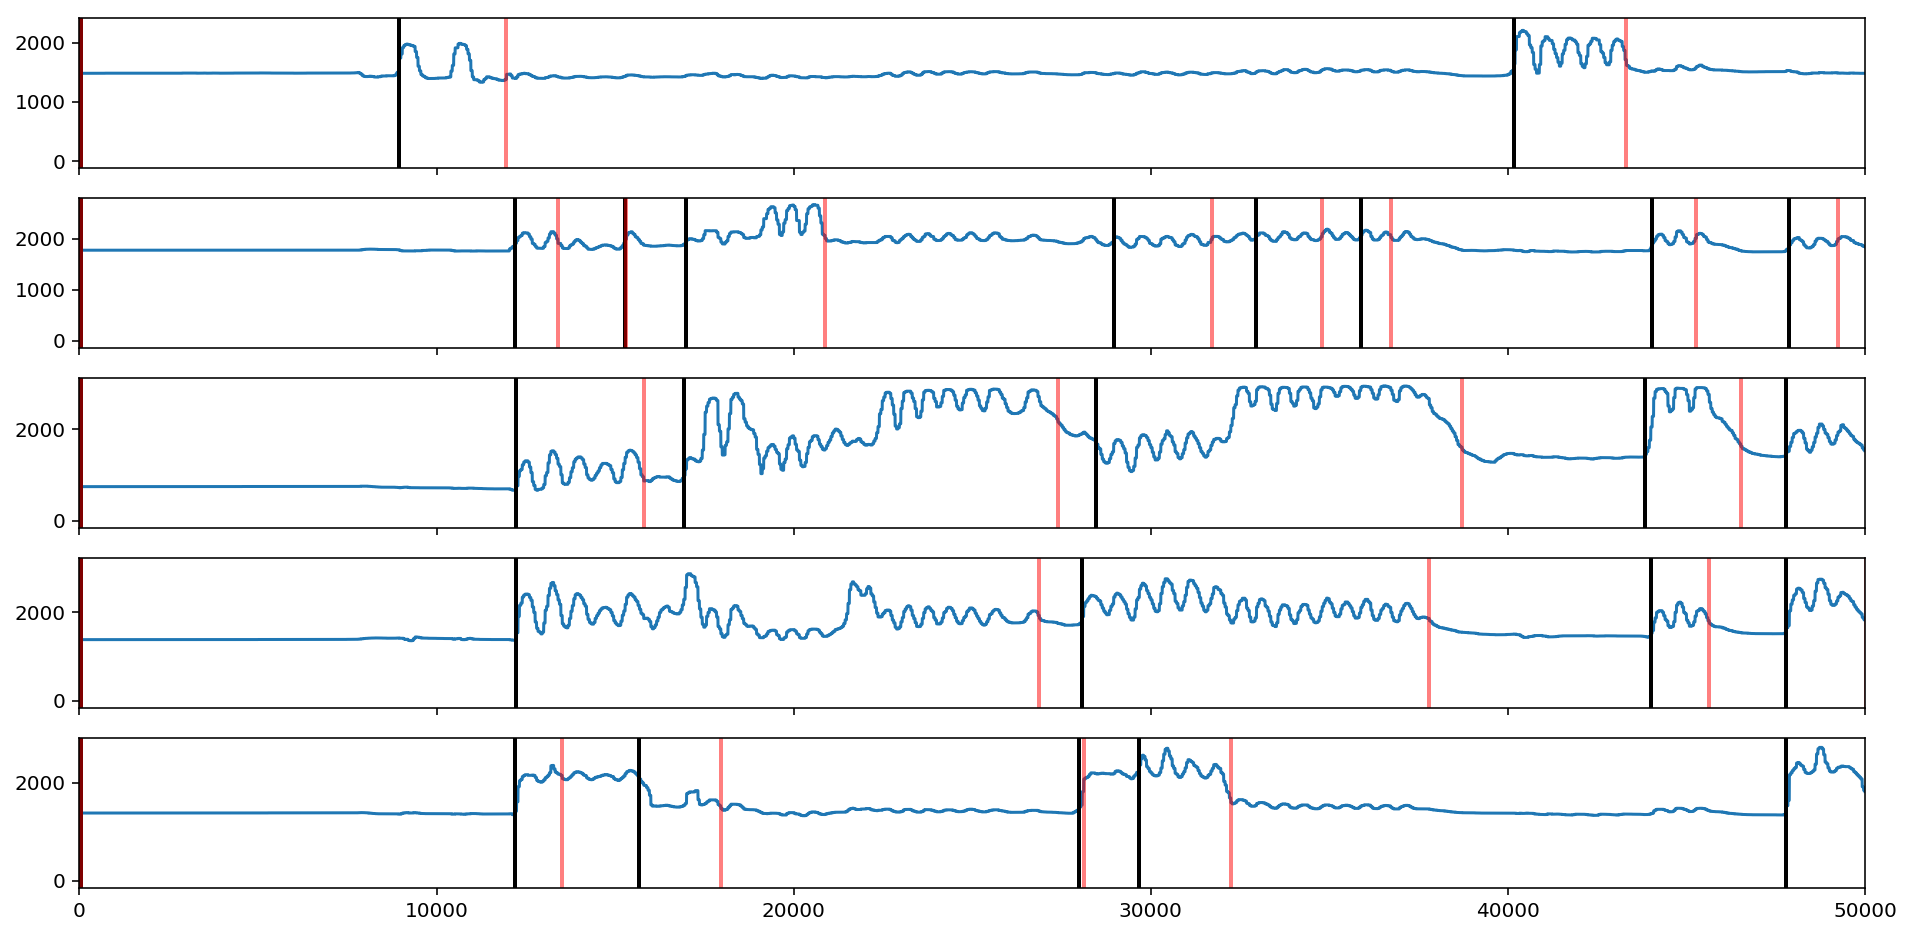

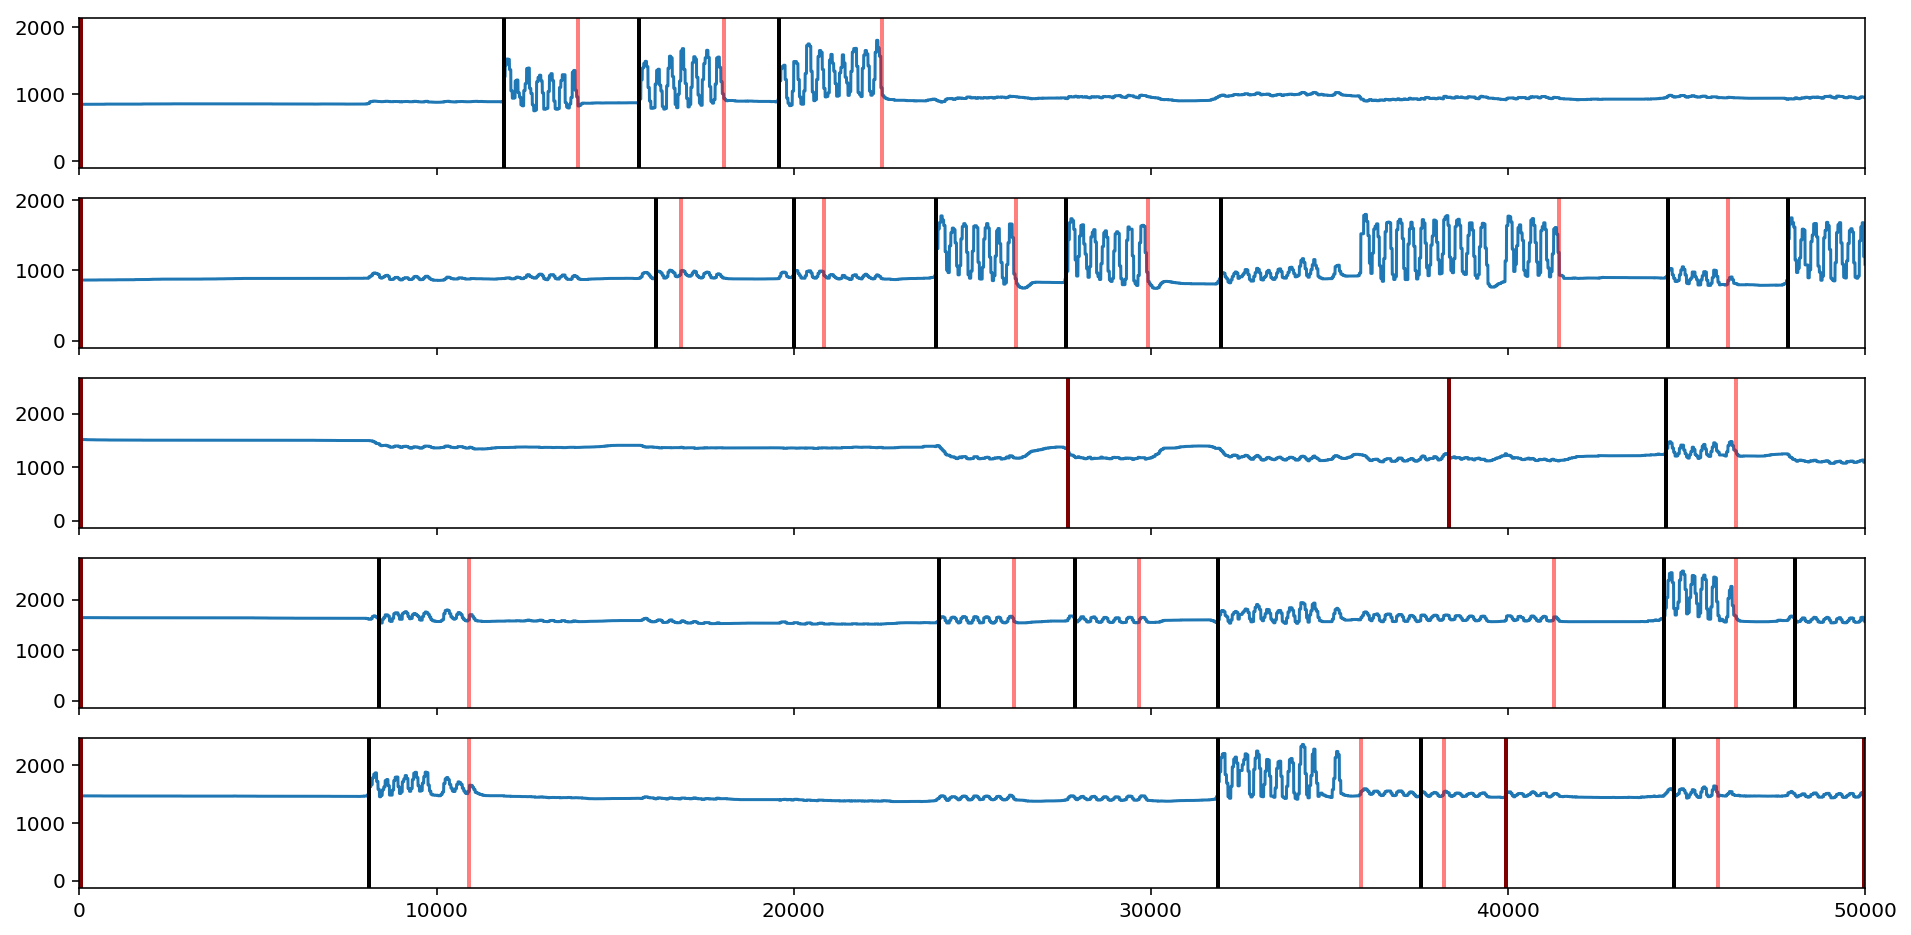

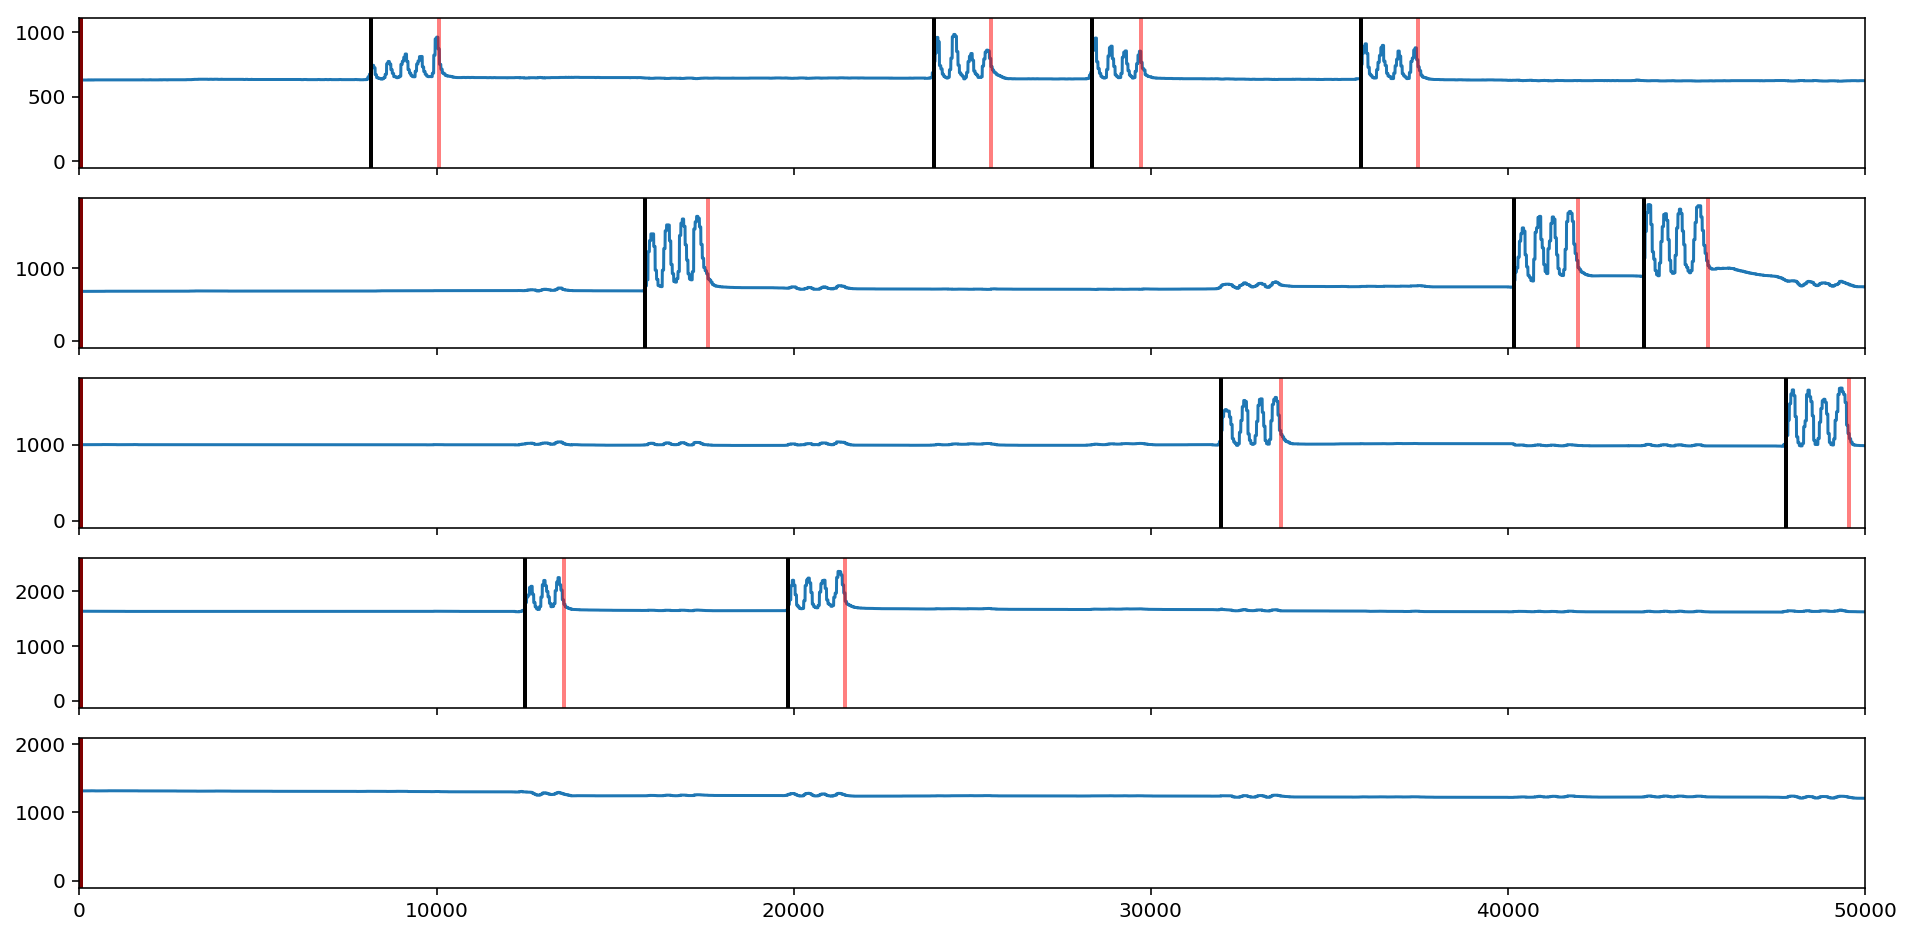

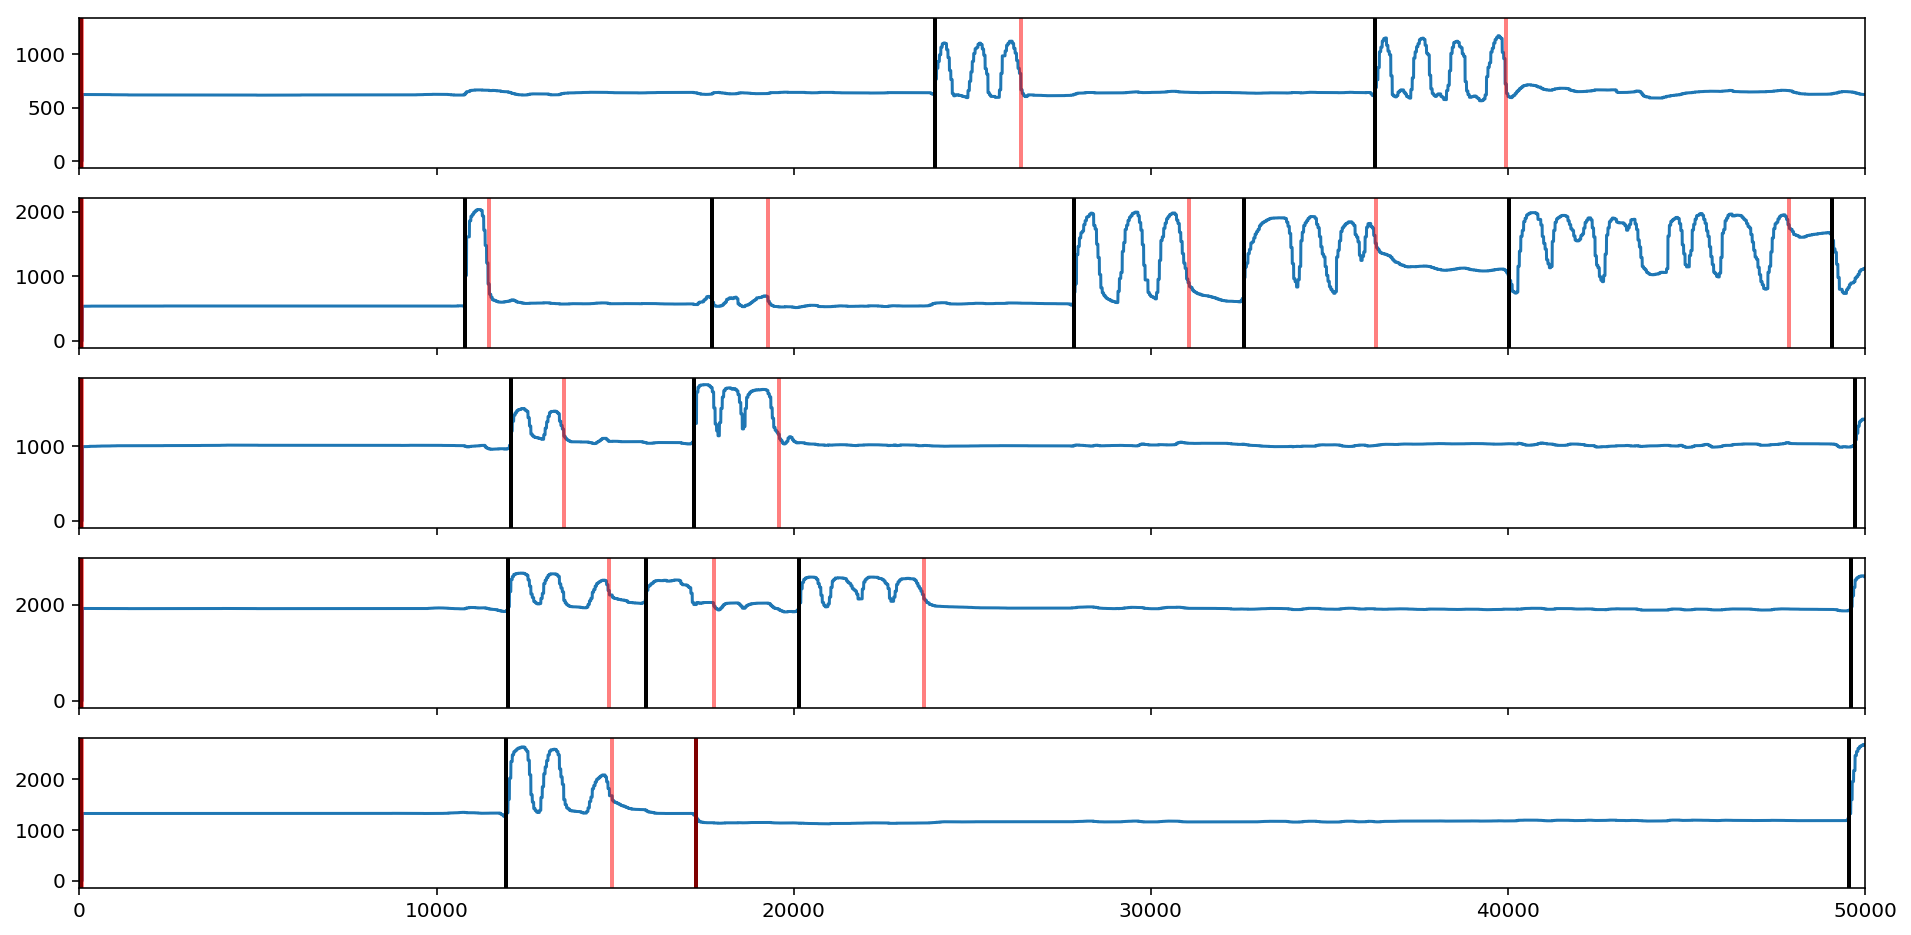

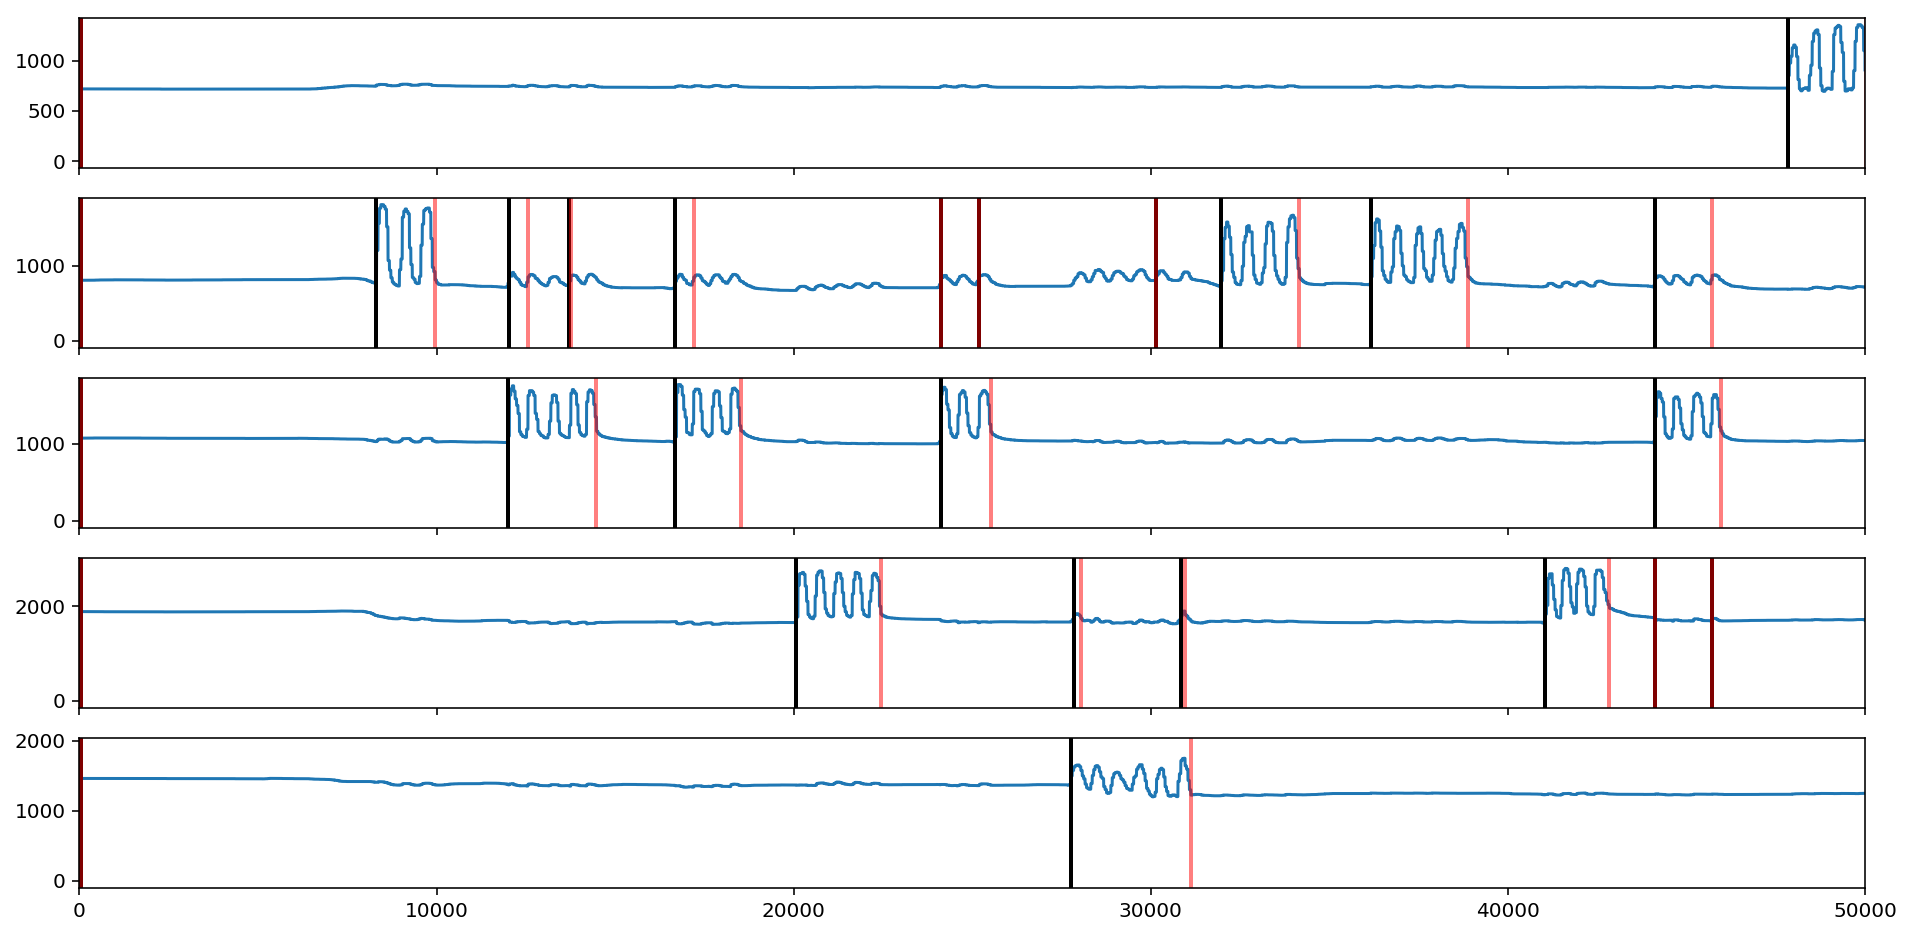

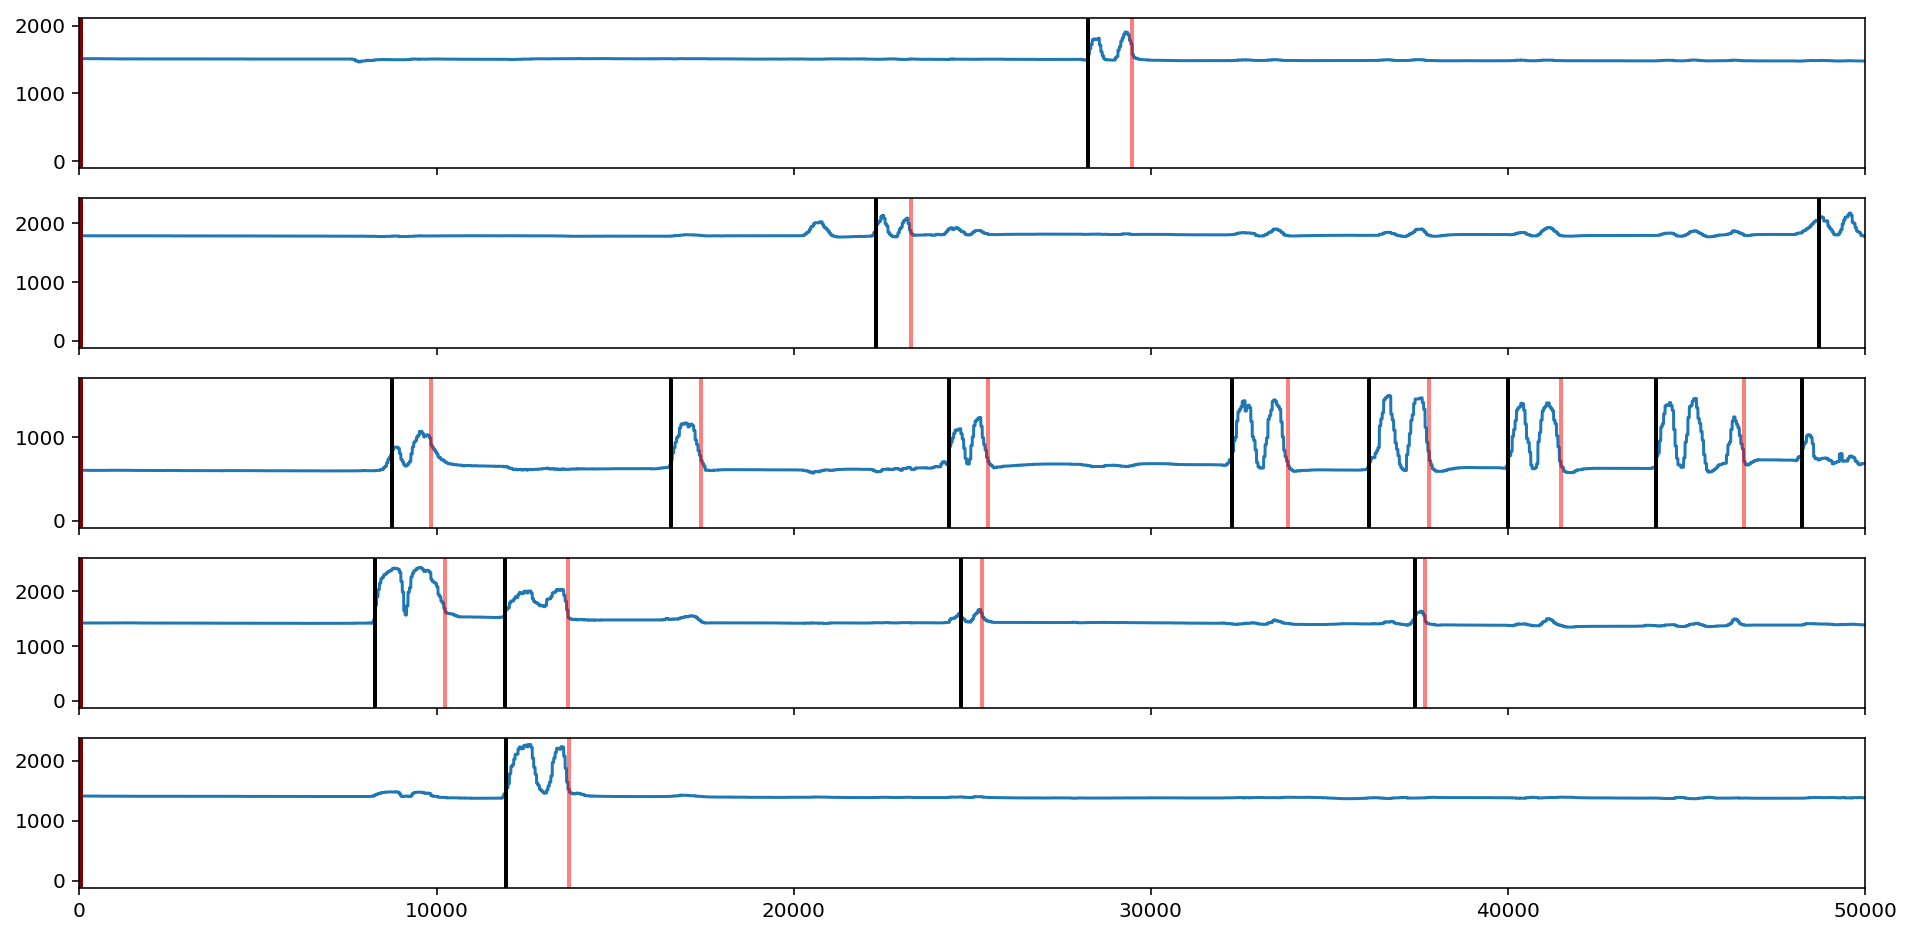

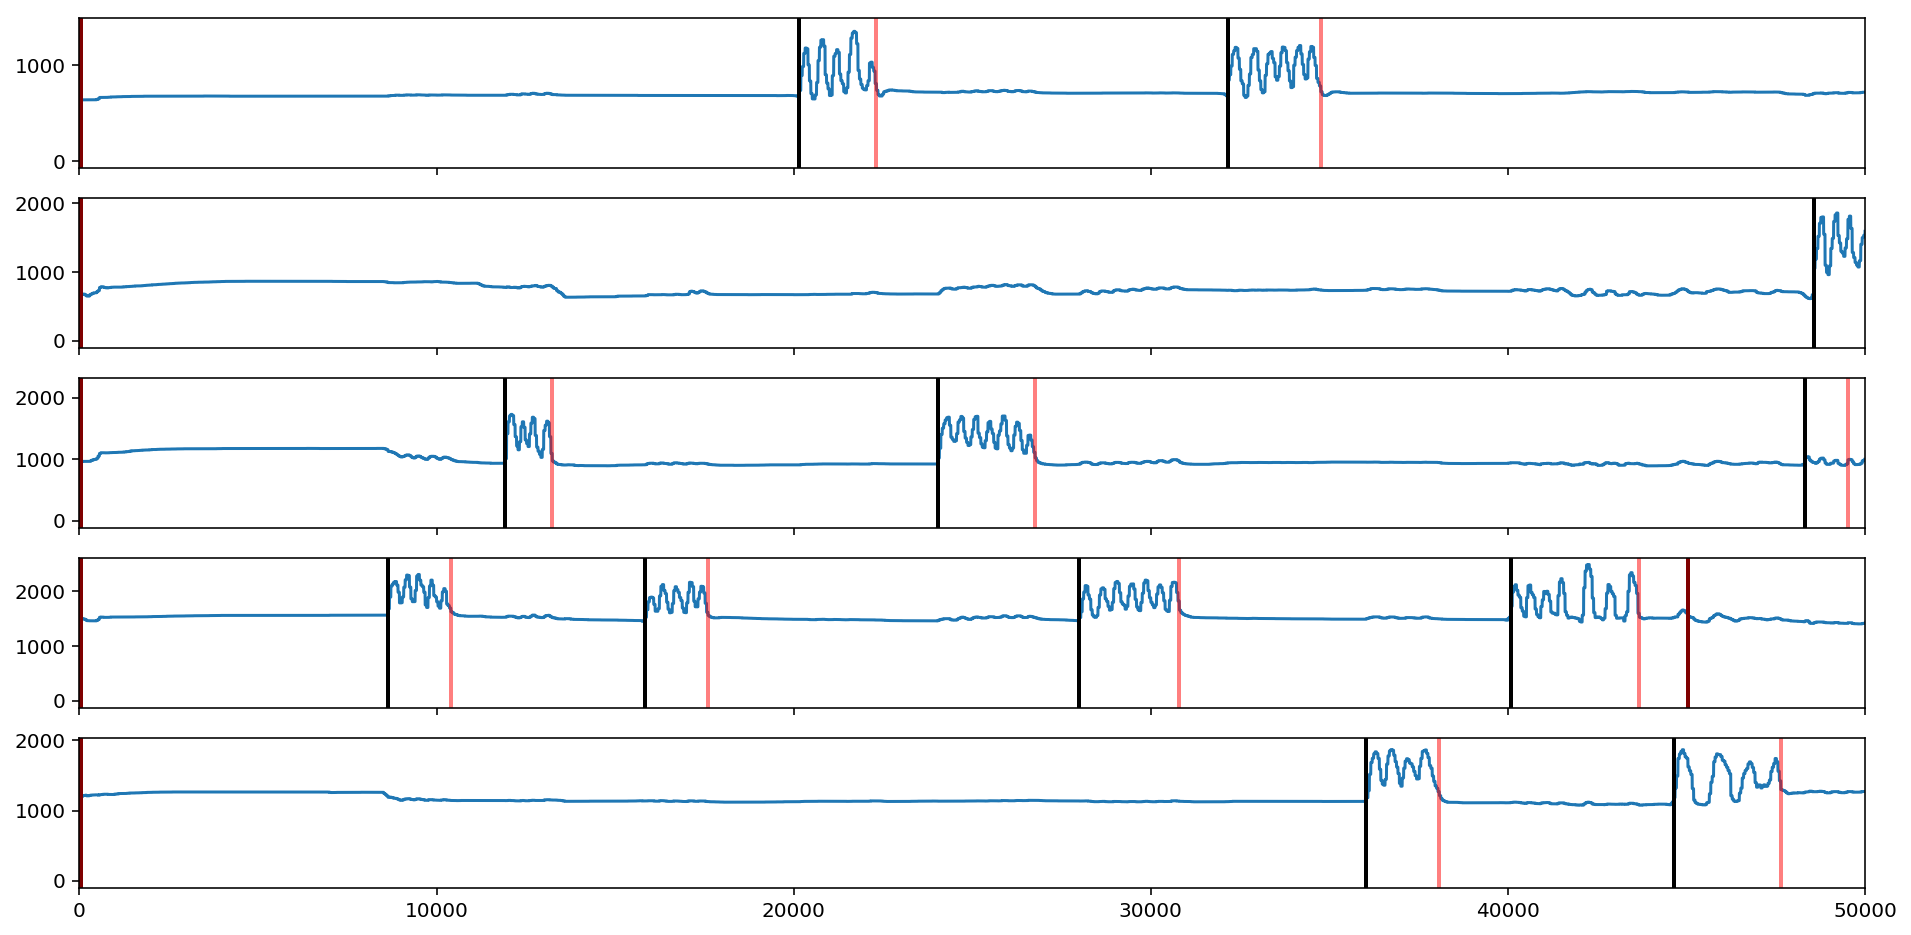

In [11]:
subj_name = 2
data_dir = 'C:/data2/dg'
subjects = glob.glob(data_dir+'/*')

all_subjects = util.get_subjects_all(data_dir,subjects)
all_cues_diff=util.load_cue(all_subjects,data_dir)
all_subj_fingers=util.get_movement_all(all_subjects,data_dir)
all_cues=util.get_cue_all(all_subjects,all_cues_diff)

raw_finger_all=util.load_raw_finger(data_dir,all_subjects)
util.plot_cue_and_finger(all_subjects,raw_finger_all,all_subj_fingers,all_cues)



# Structure behavioral data into Pandas dataframe

* Loop through each cue_start (each trial)
* For each cue_start also find:
    * cue_end
    * finger
    * move start
    * move end
    * delay start
    * delay end
    * duration move
    
each column as a key in a dictionary

In [16]:
dfs,data_frame_all=util.generate_dataframe_all(all_cues_diff,all_subj_fingers)

[     cue_end  cue_start  delay_end  delay_start  duration  finger  move_end  \
 0       9079       7079        680         1160      1520     5.0      9759   
 1      13079      11079        640          840      1800     5.0     13719   
 2      17079      15079        400          720      1680     5.0     17479   
 3      21079      19079        600          800      1800     1.0     21679   
 4      25079      23079        560          880      1680     5.0     25639   
 5      29079      27079        240         1160      1080     2.0     29319   
 6      33079      31079        840         1440      1400     3.0     33919   
 7      37079      35079         80          640      1440     4.0     37159   
 8      41079      39079        760         1000      1760     1.0     41839   
 9      45079      43079        760         1040      1720     1.0     45839   
 10     49079      47079        960         1120      1840     1.0     50039   
 11     53079      51079        480     

In [36]:
df = pd.concat(dfs)
df = df.reset_index(drop=True)
df.to_csv('./behavior_all.csv')

     cue_end  cue_start  delay_end  delay_start  duration  finger  move_end  \
0       9079       7079      680.0       1160.0    1520.0     5.0    9759.0   
1      13079      11079      640.0        840.0    1800.0     5.0   13719.0   
2      17079      15079      400.0        720.0    1680.0     5.0   17479.0   
3      21079      19079      600.0        800.0    1800.0     1.0   21679.0   
4      25079      23079      560.0        880.0    1680.0     5.0   25639.0   
5      29079      27079      240.0       1160.0    1080.0     2.0   29319.0   
6      33079      31079      840.0       1440.0    1400.0     3.0   33919.0   
7      37079      35079       80.0        640.0    1440.0     4.0   37159.0   
8      41079      39079      760.0       1000.0    1760.0     1.0   41839.0   
9      45079      43079      760.0       1040.0    1720.0     1.0   45839.0   
10     49079      47079      960.0       1120.0    1840.0     1.0   50039.0   
11     53079      51079      480.0       1000.0    1

,cue_end,cue_start,delay_end,delay_start,duration,finger,move_end,move_start,subject
0,9079,7079,680.0,1160.0,1520.0,5.0,9759.0,8239.0,bp
1,13079,11079,640.0,840.0,1800.0,5.0,13719.0,11919.0,bp
2,17079,15079,400.0,720.0,1680.0,5.0,17479.0,15799.0,bp
3,21079,19079,600.0,800.0,1800.0,1.0,21679.0,19879.0,bp
4,25079,23079,560.0,880.0,1680.0,5.0,25639.0,23959.0,bp
5,29079,27079,240.0,1160.0,1080.0,2.0,29319.0,28239.0,bp
6,33079,31079,840.0,1440.0,1400.0,3.0,33919.0,32519.0,bp
7,37079,35079,80.0,640.0,1440.0,4.0,37159.0,35719.0,bp
8,41079,39079,760.0,1000.0,1760.0,1.0,41839.0,40079.0,bp
9,45079,43079,760.0,1040.0,1720.0,1.0,45839.0,44119.0,bp


# See how many trials does each subject have

In [29]:
all_subj = df['subject'].unique()
for s in all_subj:
    print(s)
    print(sum(df['subject']==s))

bp
150
cc
150
ht
150
jc
131
jp
115
wc
150
wm
109
zt
150


# Plot histograms of finger delays

['bp', 'cc', 'ht', 'jc', 'jp', 'wc', 'wm', 'zt']


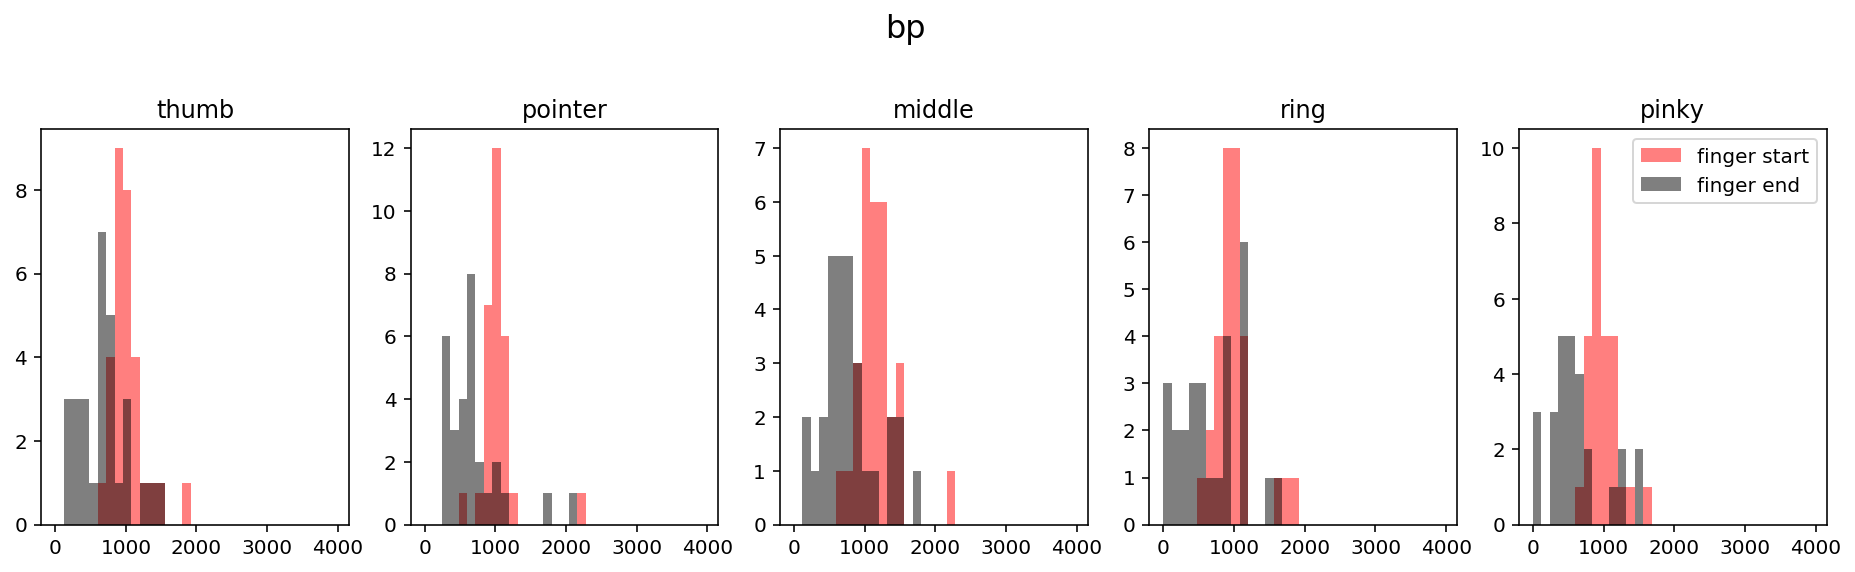

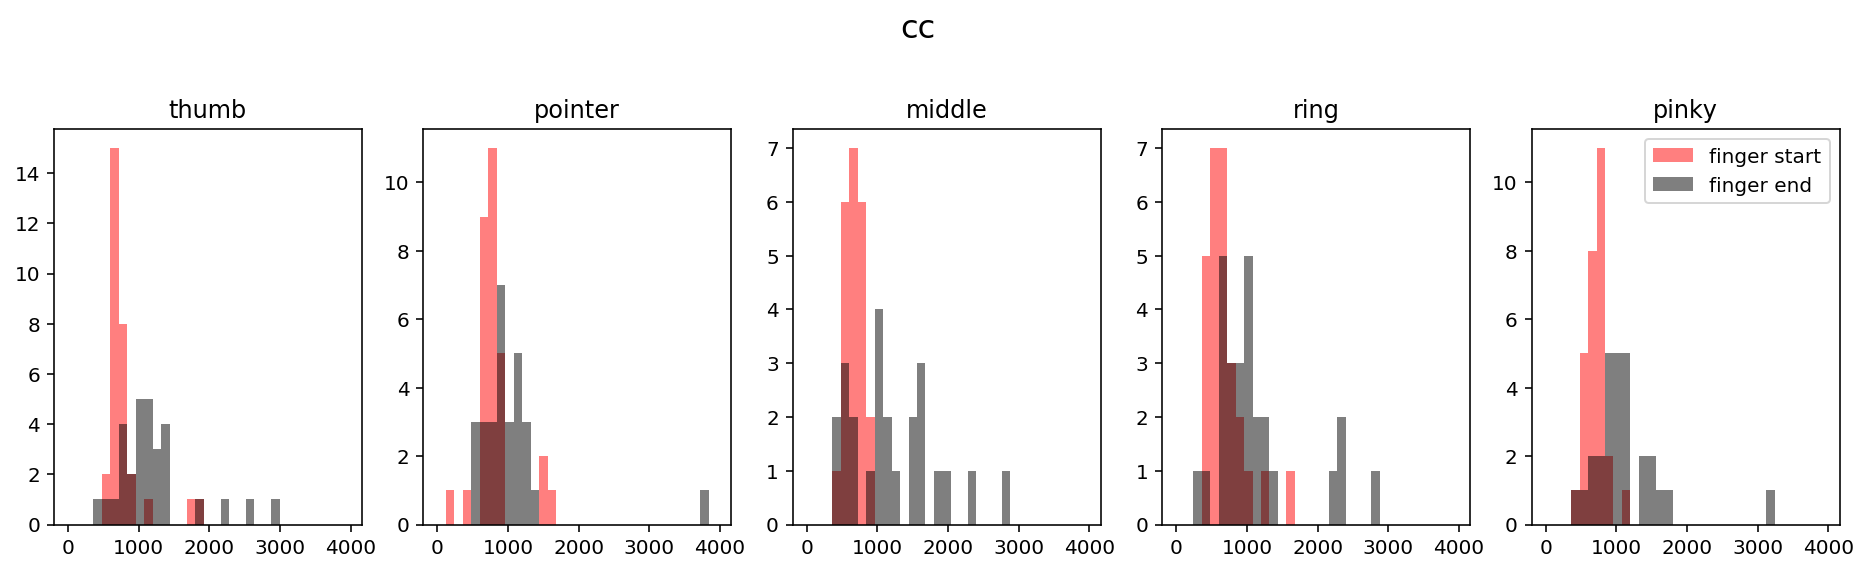

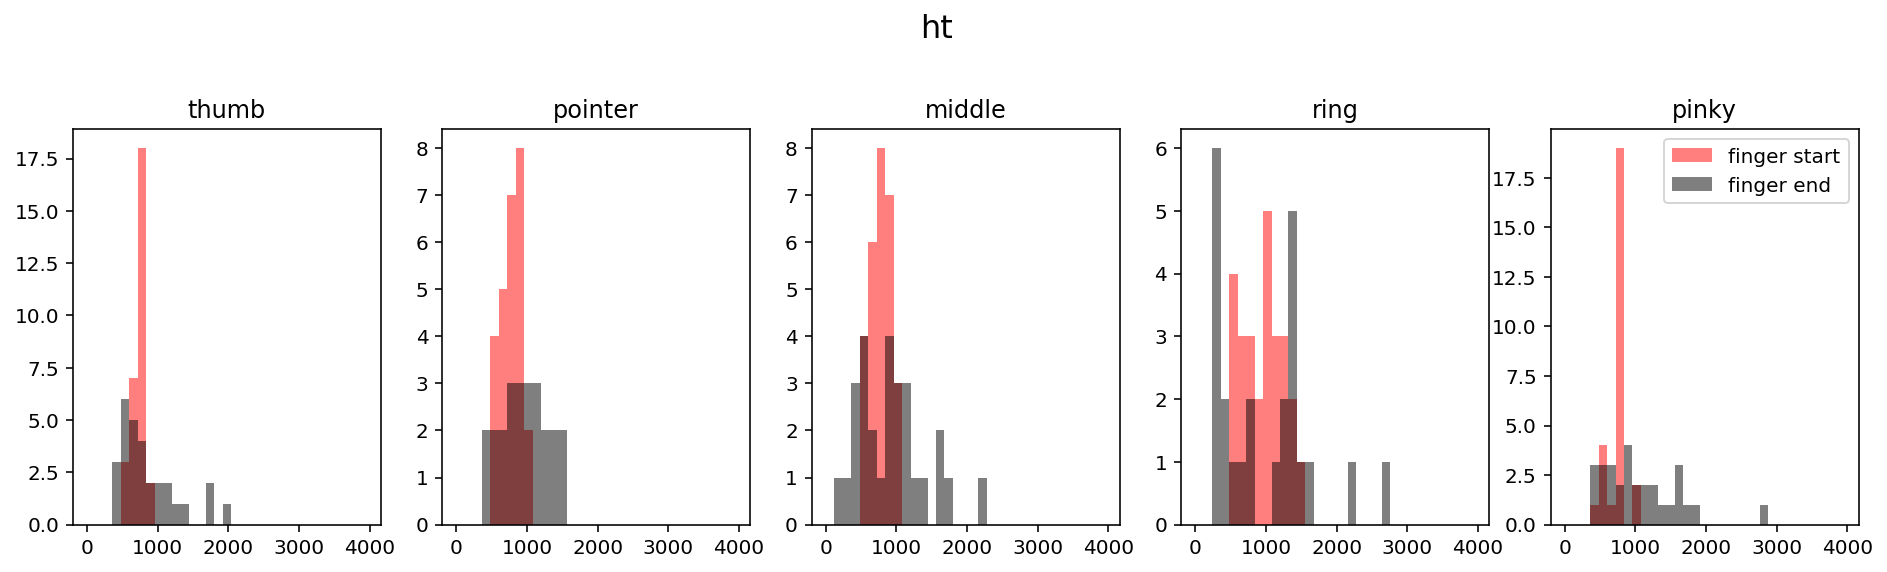

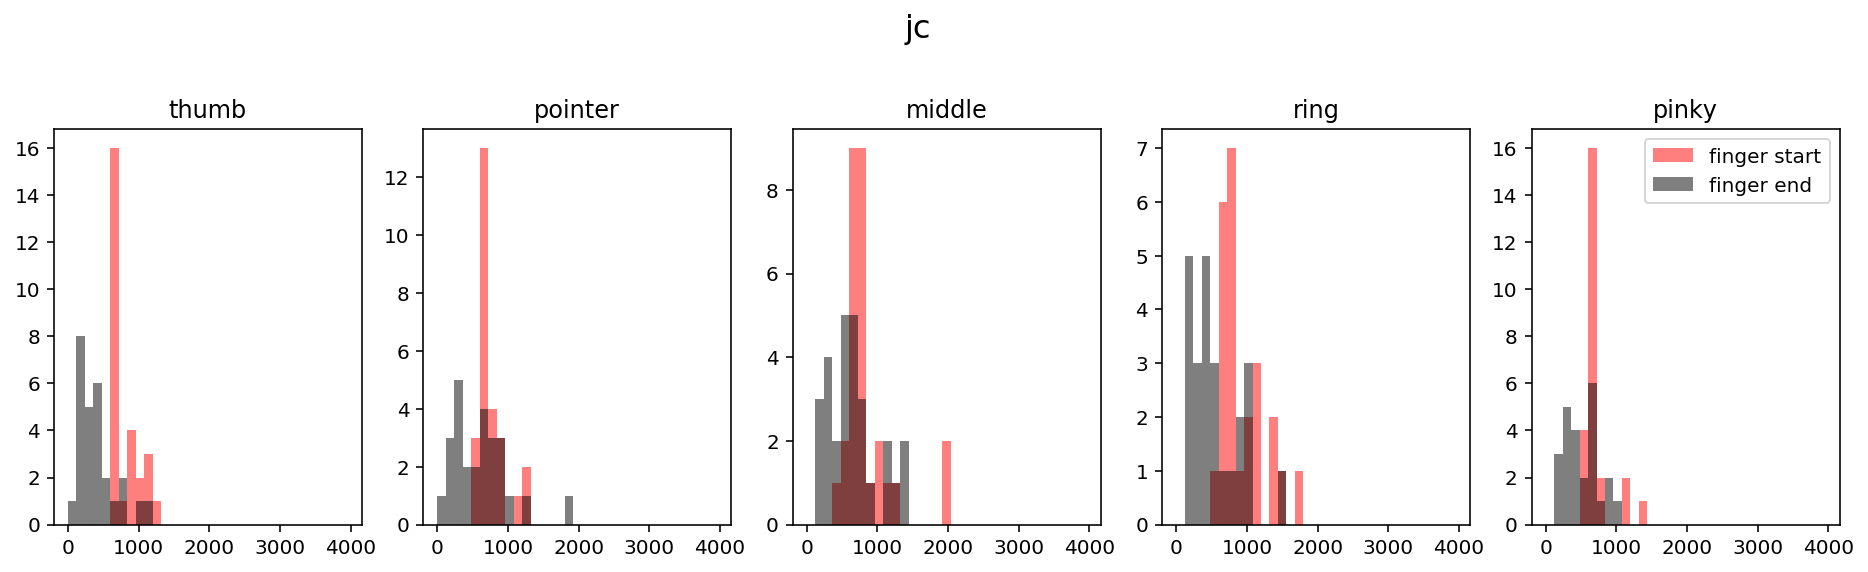

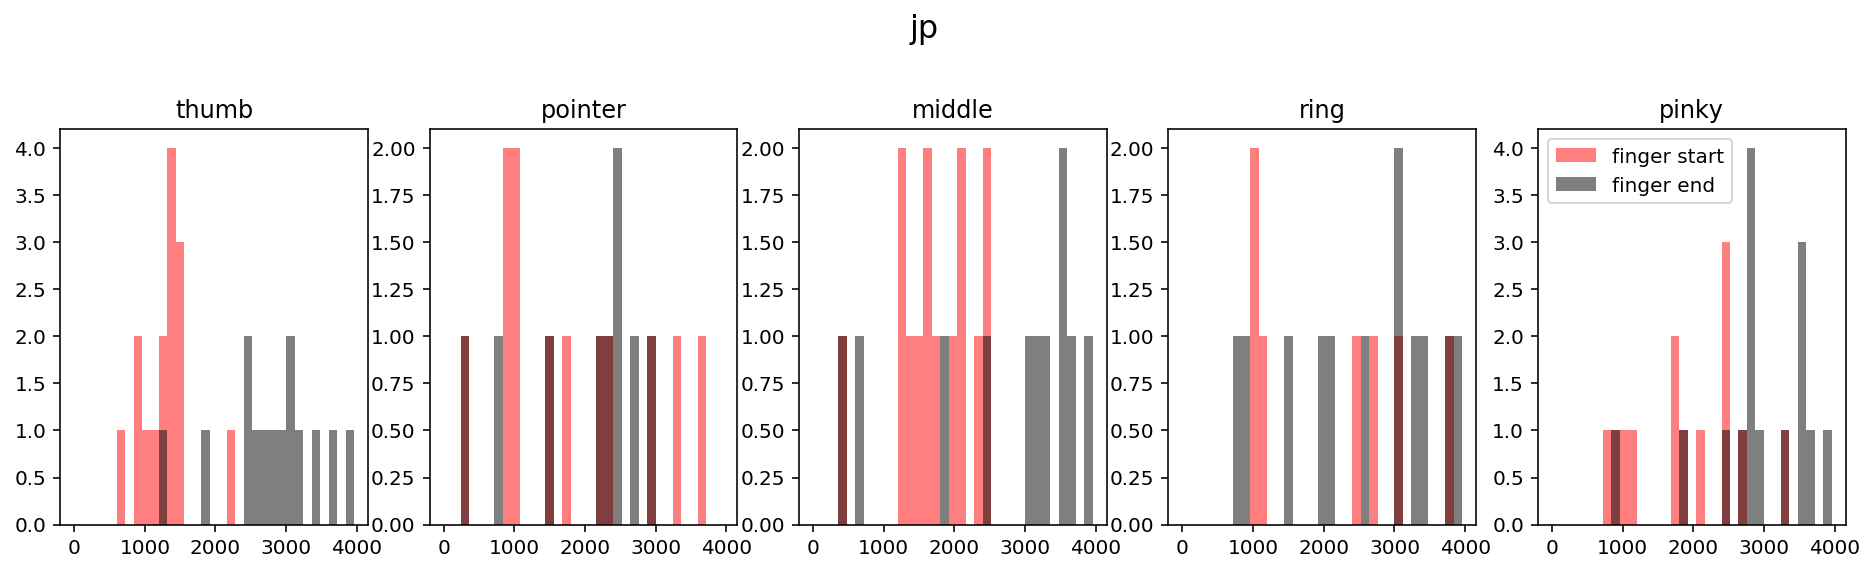

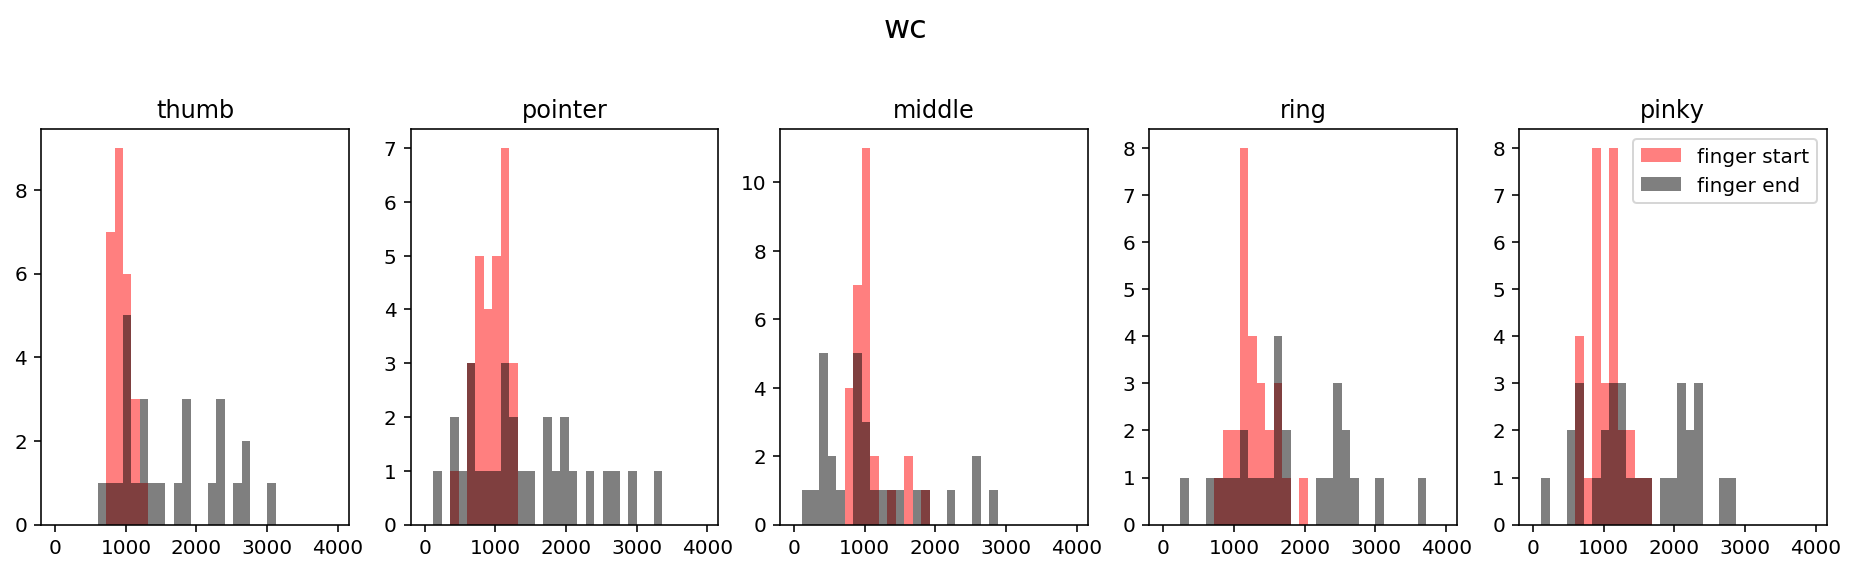

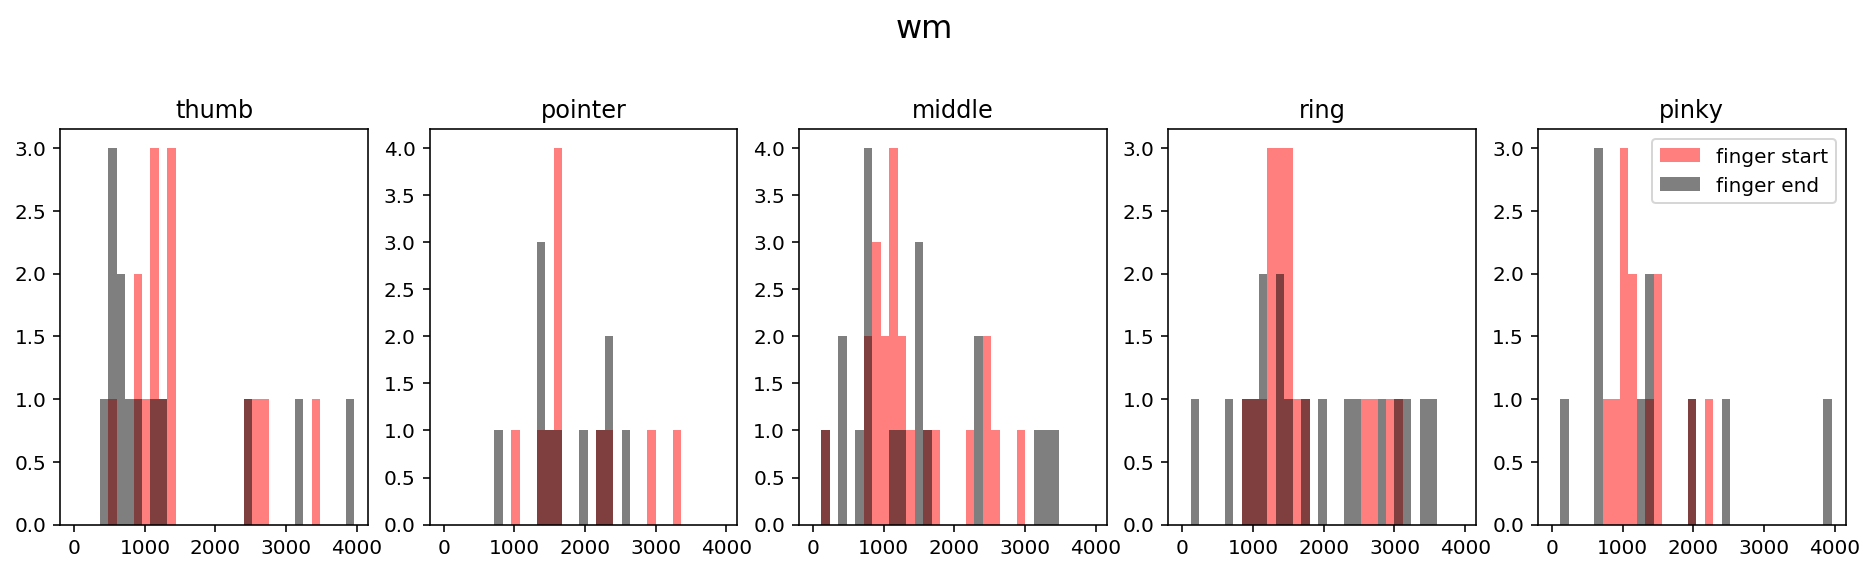

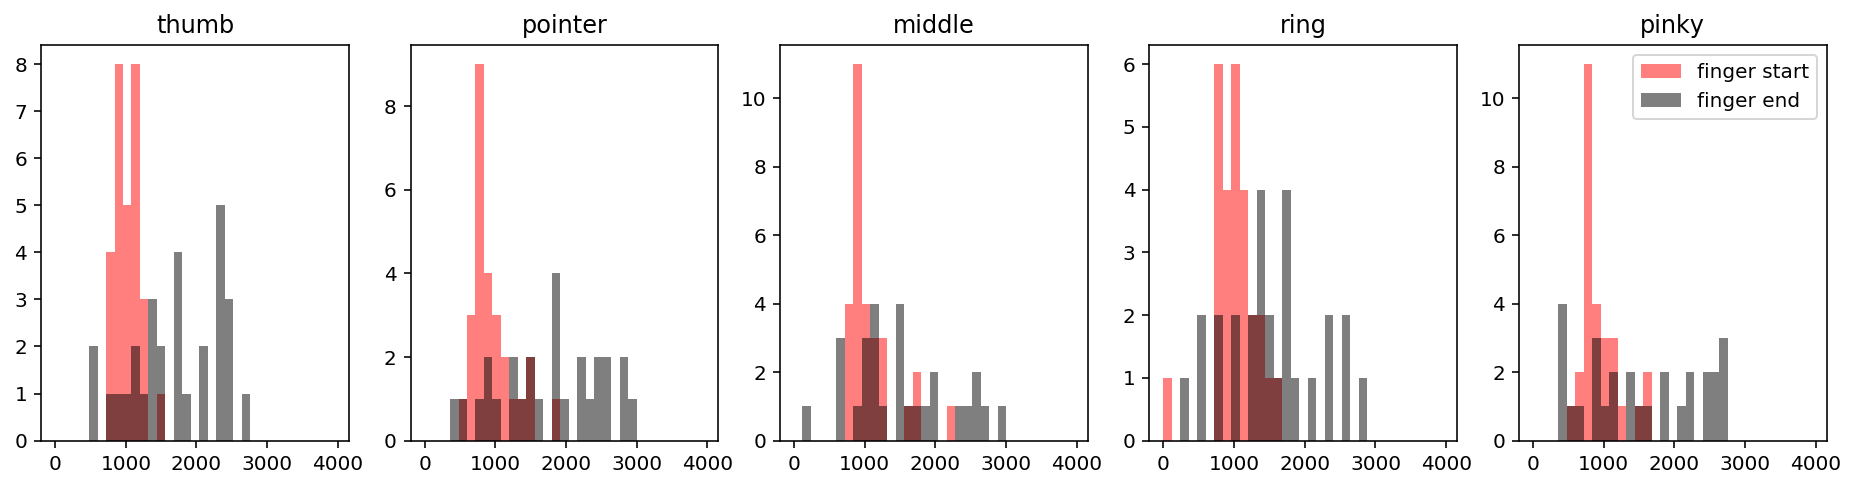

In [30]:
plt.figure(figsize=(16,8))


finger_names = ['thumb','pointer','middle','ring','pinky']

colorArr=['r','k','b','g','y']

print(all_subjects)
for j in range(len(data_frame_all)):
    fig=plt.figure(j+1)
    fig.suptitle(all_subjects[j-1], fontsize=16)
    plt.figure(figsize=(16,8))
    for i in range(5):
        plt.subplot(2,5,i+1)
        plt.title(finger_names[i])
        A=dfs[j].query('finger=='+str(i+1))['delay_start']
        B=dfs[j].query('finger=='+str(i+1))['delay_end']
        plt.hist(A[~np.isnan(A)],bins=np.arange(0,4000,120),color='r',alpha=.5,label='finger start')
        plt.hist(B[~np.isnan(B)],bins=np.arange(0,4000,120),color='k', alpha=.5,label='finger end')
    plt.legend(loc='best')
    plt.savefig('movedelay_hist_'+all_subjects[j]+'.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B64C4132B0>]], dtype=object)

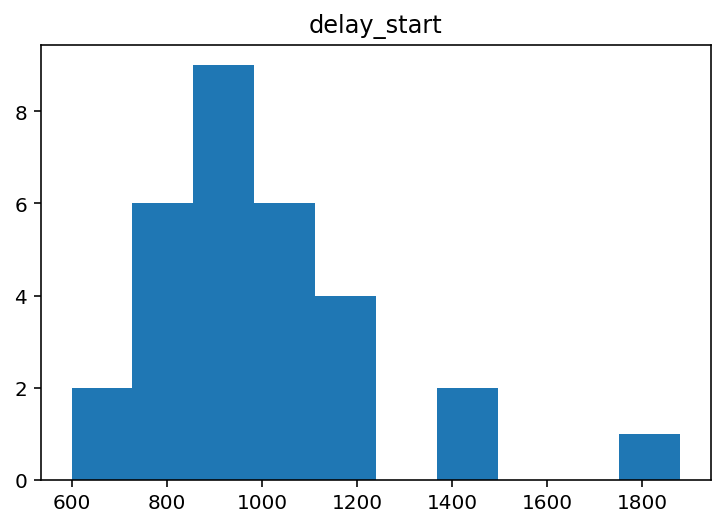

In [31]:
x=dfs[0].query('finger==1')
pd.DataFrame.hist(x,column='delay_start',grid=False)